**Assignment-1**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mobiletrain.csv')

In [ ]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
X = data.drop(columns=['price_range'])
y = data['price_range']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # Assuming 4 price range categories
])

In [ ]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
50/50 [==============================] - 1s 2ms/step - loss: 1.3618 - accuracy: 0.3338
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 1.0903 - accuracy: 0.5144
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.8822 - accuracy: 0.6012
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.6956
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7581
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7850
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8163
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8306
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8550
Epoch 10/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8687


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.9300
Test Loss: 0.2535416781902313
Test Accuracy: 0.9300000071525574


In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_labels)


13/13 [==============================] - 0s 2ms/step


**Assignment-2**

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

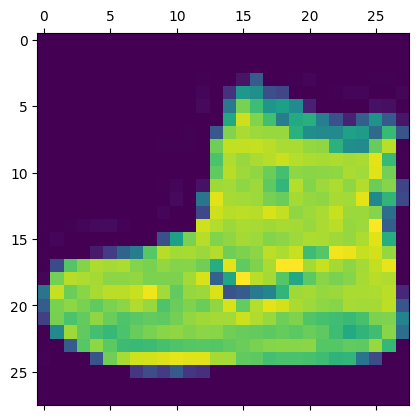

In [ ]:
plt.matshow(X_train[0])

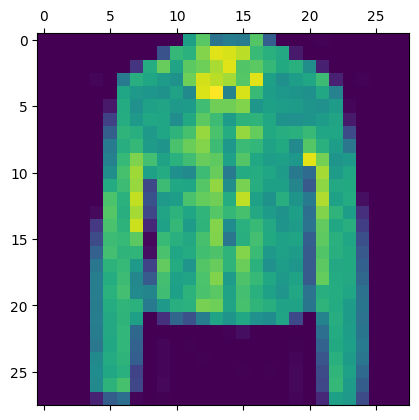

In [ ]:
plt.matshow(X_test[10])

In [ ]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)


In [ ]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 16.4427 - accuracy: 0.7472
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 11.9246 - accuracy: 0.7893
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 11.0556 - accuracy: 0.7971
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.4706 - accuracy: 0.7984
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 10.6429 - accuracy: 0.8012
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 10.5036 - accuracy: 0.8048
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.3211 - accuracy: 0.8063
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8375 - accuracy: 0.8074
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7605 - accuracy: 0.8076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss

In [ ]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.6022 - accuracy: 0.7750


[14.602181434631348, 0.7749999761581421]

**Assignment-3**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/penguins.csv")

In [ ]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [ ]:
data.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [ ]:
data.shape

(344, 9)

In [ ]:
X = data.drop(columns=['species', 'island', 'sex'])
y = data[['species', 'island', 'sex']]

In [ ]:
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model = keras.Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='softmax'),
    Dropout(0.2),
    Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5200
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6291
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 11/100
9/9 [==============================] - 0s 3ms/

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5942


[nan, 0.5942028760910034]

**Assignment-4**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
X = data.drop(columns=['output'])
y = data['output']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.6709 - accuracy: 0.5455
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7438
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7810
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8058
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8099
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8099
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8306
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8471
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8554
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8636


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


In [ ]:
model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


array([[0.09675746],
       [0.6157564 ],
       [0.86094093],
       [0.03029322],
       [0.8563974 ],
       [0.88454986],
       [0.5733987 ],
       [0.00156622],
       [0.01191807],
       [0.5220499 ],
       [0.84449154],
       [0.09969586],
       [0.89291525],
       [0.03129991],
       [0.96961206],
       [0.9325036 ],
       [0.9777416 ],
       [0.05940069],
       [0.00443937],
       [0.0304812 ],
       [0.5718475 ],
       [0.00454784],
       [0.07200065],
       [0.6431059 ],
       [0.92845595],
       [0.7058076 ],
       [0.8185127 ],
       [0.72651964],
       [0.01286228],
       [0.8877736 ],
       [0.01147493],
       [0.09024128],
       [0.00403586],
       [0.10903207],
       [0.63869226],
       [0.09883509],
       [0.8002605 ],
       [0.8508388 ],
       [0.78338003],
       [0.8321159 ],
       [0.6666329 ],
       [0.81535417],
       [0.8064979 ],
       [0.7831121 ],
       [0.76346576],
       [0.02052592],
       [0.83440816],
       [0.934